<a href="https://colab.research.google.com/github/RanaHassan-harsan/Zeham-Management-Technologies-Bootcamp/blob/main/Week5/Day%203/GRU_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRU Exercise**

## Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, GRU
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [16]:
df = pd.read_csv('/content/drive/MyDrive/Trainees - المتدربين/Week 5/5- Introduction to Time Series Forecasting/3- Time Series Forecasting (LSTM and GRU)/LAB/Datasets/traffic.csv', usecols=[1], engine='python')
dataset = df.values
dataset = dataset.astype('float32')

## Data Exploration



In [17]:
df.head()

,Junction
0,1
1,1
2,1
3,1
4,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Junction  48120 non-null  int64
dtypes: int64(1)
memory usage: 376.1 KB


In [19]:
df.describe()

,Junction
count,48120.000000
mean,2.180549
std,0.966955
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


In [20]:
df.isnull()

,Junction
0,False
1,False
2,False
3,False
4,False
...,...
48115,False
48116,False
48117,False
48118,False


In [21]:
df.isnull().sum()

,0
Junction,0


In [22]:
df.shape

(48120, 1)

## Feature Engineering (if needed)



## Exploratory Data Analysis


In [27]:
# We will use the 'Close' column as our target variable

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create sequences for the GRU model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define sequence length
seq_length = 60  # Using 60 days of data to predict the next day

# Create the sequences
X, y = create_sequences(scaled_data, seq_length)

# Reshape the data for the GRU model
X = X.reshape((X.shape[0], X.shape[1], 1))

## split into train and test sets

In [28]:
# Split the data into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [29]:
# Build the GRU model
model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Fitting The Model



In [30]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 108s 85ms/step - loss: 0.0015 - val_loss: 3.7707e-05
Epoch 2/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 101s 84ms/step - loss: 9.2609e-06 - val_loss: 3.3588e-05
Epoch 3/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 143s 85ms/step - loss: 9.2144e-06 - val_loss: 2.5657e-05
Epoch 4/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 142s 85ms/step - loss: 2.3512e-05 - val_loss: 2.2101e-05
Epoch 5/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 141s 84ms/step - loss: 3.7082e-06 - val_loss: 2.1806e-05
Epoch 6/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 101s 84ms/step - loss: 1.0912e-05 - val_loss: 2.0428e-05
Epoch 7/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 142s 84ms/step - loss: 1.1862e-05 - val_loss: 1.9463e-05
Epoch 8/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 143s 85ms/step - loss: 3.8383e-06 - val_loss: 7.4395e-05
Epoch 9/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 147s 89ms/step - loss: 1.1053e-05 - val_loss: 2.0027e-05
Epoch 10/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 137s 84ms/step - loss: 9.9002e-06 - val_loss: 2.5039e-05


## Make preductuion and evaluatuin matrix.

In [31]:
# Make predictions
predicted_stock_price = model.predict(X_test)
# Inverse transform to get actual stock prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


## Visualize the result

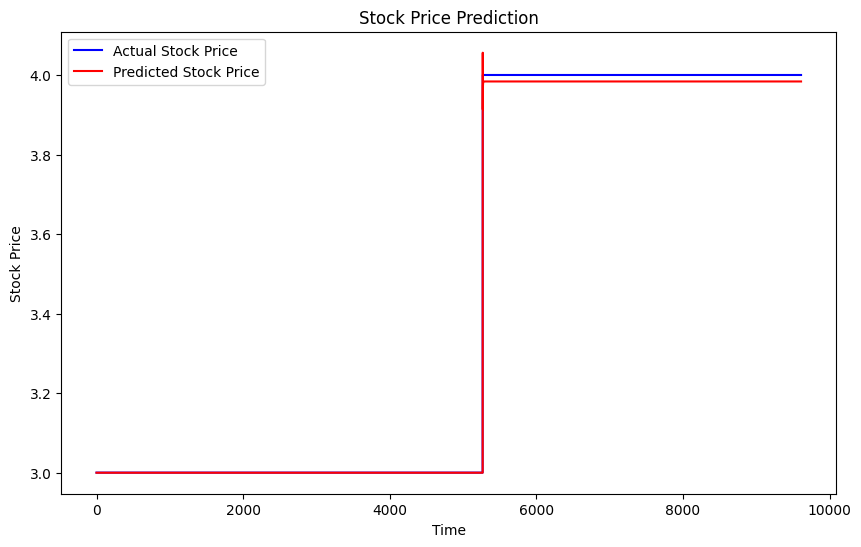

In [33]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# **Well done** :)